# Backends in Qiskit

In this notebook we will talk about backend options in Qiskit. Backends basically allow you to choose how to run the quantum circuit. You can choose from several options including using physical hardware via IBMQ Service.

Backends are available trough two providers. Aer and IBMQ. Aer provides simulators, while IBMQ provides physical hardware access through cloud.

Let's start with Aer.

In [1]:
from qiskit import Aer
for backend in Aer.backends():
    print(backend.name())

qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


We have 4 simulators listed. Until now, we've used qasm_simulator.

**Qasm(Quantum Assembly) Simulator:**
    Allows ideal and noisy multi-shot execution of qiskit circuits and returns counts or memory.
    
**Statevector Simulator:** 
    Allows ideal single-shot execution of qiskit circuits and returns the final statevector of the simulator after application.
    
**Unitary Simulator:**
    Allows ideal single-shot execution of qiskit circuits and returns the final unitary matrix of the circuit itself.
    
**Pulse Simulator:**
    The PulseSimulator simulates continuous time Hamiltonian dynamics of a quantum system, with controls specified by pulse Schedule objects, and the model of the physical system specified by PulseSystemModel objects. Results are returned in the same format as when jobs are submitted to actual devices.

For more details please refer to: [Qiskit Documentation](https://qiskit.org/documentation/the_elements.html#aer)

Readers are advised to try out all backends. Let's try the statevector simulator with a very simple [example](https://qiskit-staging.mybluemix.net/documentation/aer/simulate_statevectors.html):

In [2]:
import numpy as np

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute
from qiskit.tools.visualization import plot_state_city

from qiskit.providers.aer import StatevectorSimulator

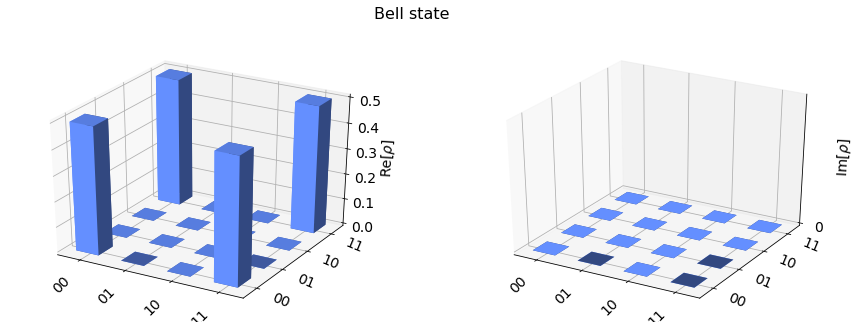

In [3]:
# Construct quantum circuit without measure
qr = QuantumRegister(2, 'qr')
circ = QuantumCircuit(qr)
circ.h(qr[0])
circ.cx(qr[0], qr[1])

# Select the StatevectorSimulator from the Aer provider
simulator = Aer.get_backend('statevector_simulator')

# Execute
result = execute(circ, simulator).result()
statevector = result.get_statevector(circ)
plot_state_city(statevector, title='Bell state')

We don't need to take a measurement to checkout the states when we are using the statevector simulator. Note that we can only do this in a simulation.

Let's go ahead and measure the Bell State:

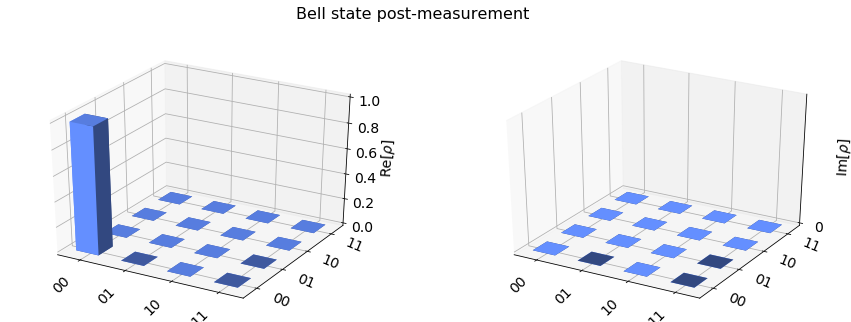

In [4]:
# Construct quantum circuit with measure
qr = QuantumRegister(2, 'qr')
cr = ClassicalRegister(2, 'cr')
circ = QuantumCircuit(qr, cr)
circ.h(qr[0])
circ.cx(qr[0], qr[1])
circ.measure(qr, cr)

# Select the StatevectorSimulator from the Aer provider
simulator = Aer.get_backend('statevector_simulator')

# Execute
result = execute(circ, simulator).result()
statevector = result.get_statevector(circ)
plot_state_city(statevector, title='Bell state post-measurement')

We see that the wavefunction collapses to a single state as expected. You can run the above cell many times and observe that the wavefunction collapses to any 4 of the states with equal probability.

Now, let's try the physical hardware using IBMQ. In this method we will create a circuit and send it to one of the available IBM Quantum Computers. First, we need to create an acount to use [IBMQ](https://quantum-computing.ibm.com).

Then click to right top most corner of the webpage. Then click My Account. There, you will a button that says "*Copy Token*". This token will be your ID that. you need to use in your code. Paste it to the cell below where it says *'MY_API_TOKEN'*.

You can follow the steps [here](https://qiskit.org/documentation/install.html#install-access-ibm-q-devices-label), if you run into trouble.

In [5]:
from qiskit import IBMQ
#IBMQ.save_account('MY_API_TOKEN')
IBMQ.load_account();

Let's check all the available hardware:

In [6]:
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>]

We can see all the available hardware listed above. These hardware are constantly used by people from all over the world. Therefore, some devices might be overload sometimes. Let's check their status.

In [7]:
for backend in provider.backends():
    print(backend.status())

BackendStatus(backend_name='ibmq_qasm_simulator', backend_version='0.1.547', operational=True, pending_jobs=3, status_msg='active')
BackendStatus(backend_name='ibmqx2', backend_version='2.0.5', operational=True, pending_jobs=10, status_msg='active')
BackendStatus(backend_name='ibmq_16_melbourne', backend_version='2.0.6', operational=True, pending_jobs=7, status_msg='active')
BackendStatus(backend_name='ibmq_vigo', backend_version='1.0.2', operational=True, pending_jobs=10, status_msg='active')
BackendStatus(backend_name='ibmq_ourense', backend_version='1.0.1', operational=True, pending_jobs=5, status_msg='active')
BackendStatus(backend_name='ibmq_london', backend_version='1.1.0', operational=True, pending_jobs=2, status_msg='active')
BackendStatus(backend_name='ibmq_burlington', backend_version='1.1.4', operational=True, pending_jobs=3, status_msg='active')
BackendStatus(backend_name='ibmq_essex', backend_version='1.0.1', operational=True, pending_jobs=1, status_msg='active')
BackendSt

With the above list, we can see which device has how many pending jobs. We can select any device but to get a result faster let's choose the least busy hardware and run an example.

In [8]:
from qiskit.providers.ibmq import least_busy

least_busy_device = least_busy(provider.backends(simulator=False))
print("Running on current least busy device: ", least_busy_device)
#real_device = provider.get_backend('ibmq_16_melbourne') # you can choose any available device


Running on current least busy device:  ibmq_essex


We are ready to execute the same Bell State measurement above. This will take some time since the experiment will be conducted on remote machine. Let's also time it.

It took 27 seconds to execute the circuit using ibmq_essex


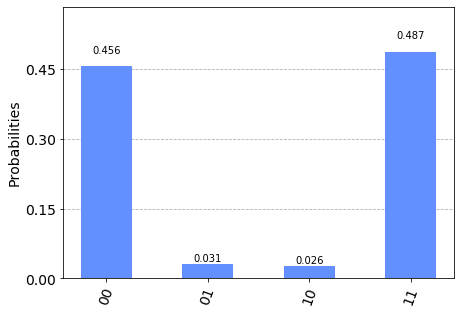

In [9]:
import time
t0 = time.time()

# Setup the Circuit
qr = QuantumRegister(2, 'qr')
cr = ClassicalRegister(2, 'cr')
circ = QuantumCircuit(qr,cr)
circ.h(qr[0])
circ.cx(qr[0], qr[1])
circ.measure(qr,cr)

# Execute the Circuit
job = execute(circ,least_busy_device,shots=1000)
counts = job.result().get_counts(circ)

duration = time.time() - t0
print('It took %d seconds to execute the circuit using %s' %(duration,least_busy_device))

# Plot measurement results to a Histogram
from qiskit.visualization import plot_histogram
plot_histogram(counts)

We've just used a **REAL** Quantum Computer. We measured the Bell State 1000 times and got the above result. What we expect was having only *00* and *11* measurements with equal probability. However, we also observed *01* and *10*. This result is due to Quantum Computers not being perfect at the moment. They are prone to error and far from ideal at the moment. Therefore, one needs to be very careful using real hardware. 

Many scientists and scientists are working hard to build a Quantum Computer that is close to ideal. The field that specializes in correcting these errors is called *Quantum Error Correction*.